In [6]:
using Random, PyPlot, Statistics
using LinearAlgebra

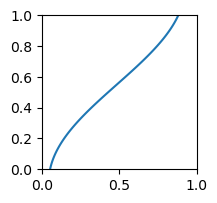

In [7]:
const a = 0.15
const k = 4
const b = 0.15, 0.5, 0.7, 0.35
v(i,y) = expm1(a*y + b[i])/expm1(1)
f(x,y) = (mod(k*x,1), v(ceil(Int,k*x),y));
psi(y) = 0.3 + y/3 - cospi(y-0.05)/4#0.2+2*(y-0.4)^2 + expm1((y-0.4)^3)/6
figure(figsize=(2,2)); xlim(0,1);ylim(0,1)
plot(psi.(0:0.01:1),0:0.01:1);

In [8]:
N = 500
nu0h = Array{Float64}(undef,N)

y = 1.0
for i = 1:1000
    y = v(rand(1:k),y)
end
for i = 1:N
    y = v(rand(1:k),y)
    nu0h[i] = y
end

In [9]:
function squareguy()
    gca().set_aspect("equal")
    xlabel("\$x\$"); ylabel("\$y\$")
    xticks((0:k)/k,["\$0\$";fill("",k-1);"\$1\$"]); yticks([0,1],["\$0\$","\$1\$"])
    xlim(0,1);ylim(0,1)
end
function theattractor()
    lines = [[0 nu0h[i]; 1 nu0h[i]] for i = 1:500]
    attractor = matplotlib.collections.LineCollection(lines,
            linewidth=0.5,alpha=0.1,zorder=1,color="k")
    gca().add_collection(attractor)
    plot([0],[0],alpha=0); yl = ylim() # plotting something quite dummy just to get the attractor's ylim
end

theattractor (generic function with 1 method)

In [15]:
methods(range)

# 4 methods for generic function "range":
[1] range(start::T; stop, length) where T<:ColorTypes.Colorant in Colors at /home/cwormell/.julia/packages/Colors/yDxFN/src/utilities.jl:231
[2] range(start::T, stop::T; kwargs...) where T<:ColorTypes.Colorant in Colors at /home/cwormell/.julia/packages/Colors/yDxFN/src/utilities.jl:235
[3] range(start; length, stop, step) in Base at range.jl:88
[4] range(start, stop; length, step) in Base at range.jl:91

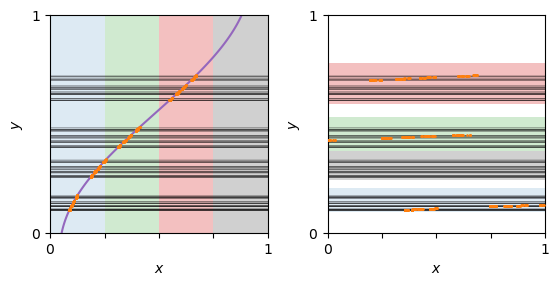

In [22]:
figure(figsize=(5.7,3.7))
cols = "C".*string.([0,2,3,7])
alphas = range(0.15,step=0.07,length=4)
subplot(121)
for i = 1:4
fill_between([(i-1)/4,i/4],[0,0],[1,1],fc=cols[i],alpha=alphas[i],ec="",linewidth=0)
end
    plot(psi.(0:0.01:1),0:0.01:1,"C4",label="\$\\mathcal{S}\$",zorder=1); #ylim(yl)
    #xlim((xlim()[2]-xlim()[1])/2*[-1,1])
    scatter(psi.(nu0h),nu0h,c="C1",s=0.8,zorder=3)

theattractor()
squareguy()

subplot(122)
for i = 1:4
fill_betweenx([v(i,0),v(i,1)],[0,0],[1,1],fc=cols[i],alpha=alphas[i],ec="")
end
#     plot(psi.(0:0.01:1),0:0.01:1,"C4",label="\$b(\\mathcal{S})\$",zorder=1); ylim(yl)
    #xlim((xlim()[2]-xlim()[1])/2*[-1,1])
fsingpts_v(i) = getindex.(f.(psi.(nu0h),nu0h),i)
scatter(fsingpts_v(1),fsingpts_v(2),c="C1",s=0.8,zorder=3)

theattractor()
squareguy()

# subplot(133)
# theattractor()
#     plot(psi.(0:0.01:1),0:0.01:1,"C4",label="\$\\mathcal{S}\$",zorder=1); ylim(yl)
#     #xlim((xlim()[2]-xlim()[1])/2*[-1,1])
#     scatter(psi.(nu0h[1:300]),nu0h[1:300],c="C1",s=1,zorder=3)
# squareguy()

tight_layout()
savefig("../figures/Baker.pdf")

In [32]:
2/9*1.3^2

0.3755555555555556